Silhouette Score: 0.57
R-squared Score: 1.00
    Year       Brand    Type   Price  Cluster
0   2022  Mitsubishi  Pickup  539000        2
1   2020       Isuzu  Pickup  399000        2
2   2021        Ford  Pickup  389000        2
3   2023        Ford  Pickup  799000        1
4   2021       Isuzu  Pickup  419000        2
5   2022  Mitsubishi  Pickup  379000        2
6   2021        Ford  Pickup  395000        2
7   2021       Isuzu  Pickup  539000        2
8   2022  Mitsubishi     Van  579000        2
9   2023      Nissan   Sedan  445000        2
10  2022       Mazda   Sedan  389000        2
11  2020       Honda   Sedan  399000        2
12  2020  Mitsubishi   Sedan  285000        0
13  2022          Mg     SUV  399000        2
14  2021          Mg   Sedan  399000        2
15  2021          Mg   Sedan  225000        0
16  2021      Suzuki   Sedan  369000        2
17  2020       Isuzu  Pickup  399000        2
18  2021        Ford  Pickup  369000        2
19  2023        Ford  Pickup  79900

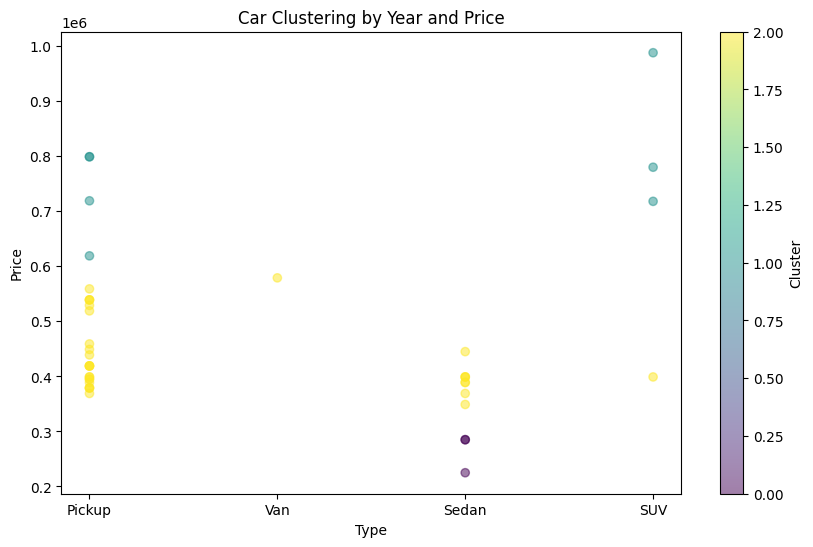

In [8]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# อ่านข้อมูลจากไฟล์ CSV
df = pd.read_csv('car_data_with_prices.csv')

# เลือกเฉพาะคอลัมน์ที่ต้องการ
data = df[['Year', 'Brand', 'Type', 'Price']]

# ตรวจสอบและจัดการค่าที่หายไป
data = data.dropna()  # หรือใช้ fillna() ถ้าต้องการเติมค่าที่หายไป

# เข้ารหัสยี่ห้อและประเภทรถให้เป็นตัวเลข
label_encoder_brand = LabelEncoder()
data['Brand_encoded'] = label_encoder_brand.fit_transform(data['Brand'])

label_encoder_type = LabelEncoder()
data['Type_encoded'] = label_encoder_type.fit_transform(data['Type'])

# เตรียมข้อมูลสำหรับโมเดล K-Means (เฉพาะคอลัมน์ Year, Brand_encoded, Type_encoded, Price)
X = data[['Year', 'Brand_encoded', 'Type_encoded', 'Price']]
y = data['Price']

# สร้างโมเดล K-Means และกำหนดจำนวนกลุ่ม (เช่น 3 กลุ่ม)
kmeans = KMeans(n_clusters=3, random_state=0)
data['Cluster'] = kmeans.fit_predict(X)

# คำนวณ Silhouette Score
silhouette_avg = silhouette_score(X, data['Cluster'])
print(f'Silhouette Score: {silhouette_avg:.2f}')

# สร้างโมเดลการถดถอย
regression_model = LinearRegression()
regression_model.fit(X, y)

# ทำนายราคา
predictions = regression_model.predict(X)

# คำนวณ R-squared score
r_squared = r2_score(y, predictions)
print(f'R-squared Score: {r_squared:.2f}')

# แสดงผลลัพธ์การจัดกลุ่ม
print(data[['Year', 'Brand', 'Type', 'Price', 'Cluster']])

# แสดงกราฟการจัดกลุ่ม (เลือกฟีเจอร์ที่ต้องการแสดง)
plt.figure(figsize=(10, 6))
plt.scatter(data['Type'], data['Price'], c=data['Cluster'], cmap='viridis', alpha=0.5)
plt.xlabel('Type')
plt.ylabel('Price')
plt.title('Car Clustering by Year and Price')
plt.colorbar(label='Cluster')
plt.show()


In [5]:
kmeans

KMeans(n_clusters=3, random_state=0)

In [6]:
import pickle

# สมมติว่า 'model' คือโมเดล Linear Regression ที่ฝึกเสร็จแล้ว
filename = 'model.pkl'

# บันทึกโมเดลไปที่ดิสก์
with open(filename, 'wb') as file:
    pickle.dump(kmeans, file)
